In [116]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [117]:
class BigTurbine():
    def __init__(self, number_of_blades=80, number_of_coils=8, number_of_shafts=None, inductor_efficiency = None, inductor_drag = None, inductor_bonus=None):
        self.number_of_blades = number_of_blades
        self.number_of_coils = number_of_coils
        if number_of_shafts is None:
            self.number_of_shafts = number_of_blades/4 + number_of_coils
        else:
            self.number_of_shafts = number_of_shafts
        if inductor_bonus is None or inductor_drag is None or inductor_efficiency is None:
            raise ValueError("Inductor parameters not set")
        self.inductor_efficiency = inductor_efficiency
        self.inductor_drag = inductor_drag
        self.inductor_bonus = inductor_bonus

        self.rotor_mass = (self.number_of_blades + self.number_of_shafts) * 10
        self.rotor_energy = 0

    def get_generated_energy(self, rotor_speed = None, steam_input = 2000):
        """
        amount of rf generated in one tick
        """
        if rotor_speed is None:
            current_rotor_speed = self.rotor_speed(steam_input)
        else:
            current_rotor_speed = rotor_speed
        result =  self.inductor_efficiency * self.get_turbine_efficiency(current_rotor_speed) * (self.number_of_coils * self.inductor_drag * current_rotor_speed)**self.inductor_bonus
        if rotor_speed is None:
            self.rotor_energy = self.get_next_rotor_energy(steam_input)
        return result

    def get_turbine_efficiency(self, rotor_speed):
        if rotor_speed >= 500:
            return 0.25 * (math.cos(rotor_speed/(45.5 * math.pi)) + 3)
        else:
            return 0.5
    
    def rotor_speed(self, steam_input=2000):
        next_rotor_energy = self.get_next_rotor_energy(steam_input)
        return self.rotor_energy/(self.number_of_blades * self.rotor_mass)
    
    def get_next_rotor_energy(self, steam_input):
        induction_torque = (self.number_of_coils * self.inductor_drag)/(self.number_of_blades * self.rotor_mass)
        usable_steam_energy = 10*min(25*self.number_of_blades, steam_input)
        lift_torque = (self.number_of_blades * (10*steam_input - usable_steam_energy))/(steam_input/25) + usable_steam_energy
        a = 1 - induction_torque - 1/(4000* self.rotor_mass)
        b = lift_torque - (self.rotor_mass/10)
        return self.rotor_energy*a + b


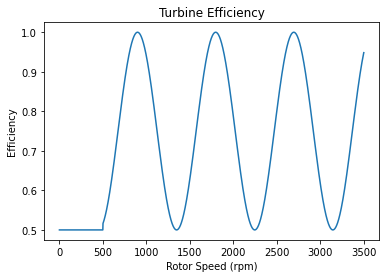

In [118]:
# plot turbine_efficiency from 0 to 3500
xs = [x for x in range(0, 3500)]
ys = [turbine_efficiency(x) for x in xs]
plt.plot(xs, ys)
plt.title("Turbine Efficiency")
plt.ylabel("Efficiency")
plt.xlabel("Rotor Speed (rpm)")
plt.show()

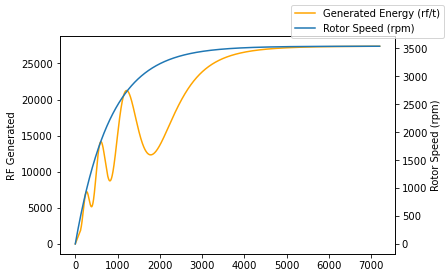

In [119]:
turbine = BigTurbine(number_of_blades=80, number_of_coils=16, number_of_shafts=None,  inductor_efficiency = 1.155, inductor_drag = 0.35, inductor_bonus=1.02)
time = 60*120
xs = np.linspace(0, time, time*20)
steam_input = 2000
ys = []
ys2 = []
for i in range(0, 20*time):
    ys.append(turbine.get_generated_energy(steam_input=steam_input))
    ys2.append(turbine.rotor_speed(steam_input=steam_input))
fig, ax1 = plt.subplots()
ax1.plot(xs, ys, color='orange')
ax1.set_ylabel("RF Generated")
ax2 = ax1.twinx()
# set ax2 to log scale
ax2.set_ylabel("Rotor Speed (rpm)")
ax2.plot(xs, ys2)
# make legend
fig.legend(["Generated Energy (rf/t)", "Rotor Speed (rpm)"])

plt.savefig("turbine_efficiency.png", facecolor='white')
plt.show()


max rpms 3537.5011196775604


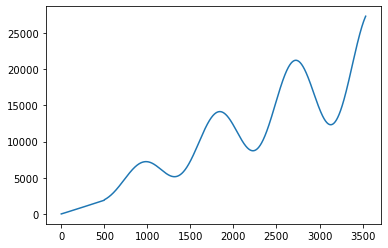

max energy 27337.086245422885


In [120]:
# reset the turbine
turbine = BigTurbine(number_of_blades=80, number_of_coils=8*2, number_of_shafts=None,  inductor_efficiency = 1.155, inductor_drag = 0.35, inductor_bonus=1.02)
max_rpms = max(ys2)
print('max rpms', max_rpms)
xs = np.arange(0, int(max_rpms))
ys = []
for i in range(0, int(max_rpms)):
    ys.append(turbine.get_generated_energy(i))
plt.plot(xs, ys)
plt.show()
print('max energy', max(ys))